In [40]:
import astropy
from astropy.io import ascii
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt


In [41]:
sp1 = ascii.read("../../../reduccion/NGC1313/cal/slit1_ascii.txt")
print(sp1)

      col1           col2   
---------------- -----------
4024.00463867189   0.2809365
4025.50053572656   0.1263353
4026.99643278123   0.6645973
 4028.4923298359   0.2400979
4029.98822689057   0.4354501
4031.48412394525 -0.03192461
4032.98002099992   0.2785238
4034.47591805459   0.2410768
4035.97181510926   0.3245422
4037.46771216393   0.3363686
             ...         ...
7349.38379120828  0.07615397
7350.87968826295  0.07790677
7352.37558531762  0.07631195
7353.87148237229  0.07529981
7355.36737942697  0.07321899
7356.86327648164  0.07274434
7358.35917353631  0.06967138
7359.85507059098  0.07259004
7361.35096764566  0.07287291
7362.84686470033  0.07423379
  7364.342761755  0.06625135
Length = 2234 rows


In [42]:
# renombrar las columnas
sp1['col1'].name = 'wavelength'
sp1['col2'].name = "flux"



In [43]:
wave = sp1["wavelength"]
flux = sp1["flux"]

In [56]:
wave.data

array([4024.00463867, 4025.50053573, 4026.99643278, ..., 7361.35096765,
       7362.8468647 , 7364.34276175])

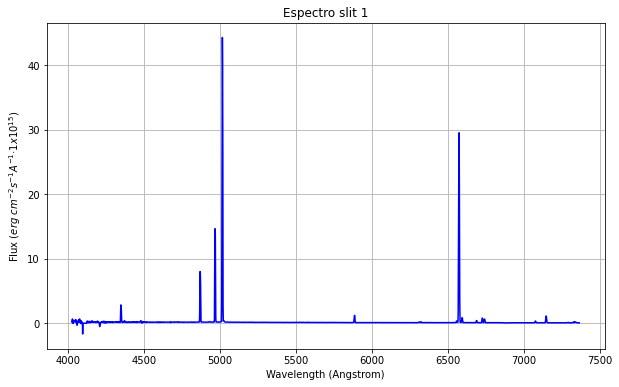

In [51]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave, flux, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{15})$')
plt.title('Espectro slit 1')
plt.grid(True)
plt.show()

In [52]:
import extinction

In [57]:
#tengo mi array de longitudes de onda de todo el espectro: wave
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v (de NED) es 0.299
extinction.ccm89(wave, 0.299, 3.1)

array([0.43563222, 0.43548925, 0.43534611, ..., 0.2074851 , 0.20741561,
       0.20734611])

In [58]:
# Fitzpatrick (1999)
extinction.fitzpatrick99(wave, 0.299, 3.1)

array([0.42348602, 0.4233575 , 0.42322902, ..., 0.18983148, 0.18976888,
       0.18970631])

In [59]:
# The Fitzpatrick & Massa (2007) function has a fixed 𝑅𝑉 of 3.1:
extinction.fm07(wave, 0.299)

array([0.42440037, 0.42426886, 0.42413734, ..., 0.18972868, 0.18966116,
       0.18959367])

In [60]:
from extinction import ccm89, fm07, fitzpatrick99, remove

In [69]:
asdf = np.ones(3)
asdf

# "deredden" flux by A_V = 0.299 with CCM89
remove(ccm89(wave, 0.299, 3.1), flux)

0.419624711988652
0.1886776316615044
0.9924234429496577
0.35848375148523387
0.6500729748121912
-0.04765317604363402
0.41569138820298773
0.35975474426794696
0.4842444092702112
0.501823675208466
0.6393271783083786


In [72]:
# "deredden" flux by A_V = 1.0 with fm07
remove(fm07(wave, 0.299), flux)

0.4153061053046626
0.18673780989371389
0.9822307136044995
0.3548057807930075
0.6434104405971806
-0.047165309562331885
0.41144025044101035
0.3560797308328648
0.47930325413331276
0.49670898054349893
0.6328185474970115


In [71]:
# "deredden" flux by A_V = 0.299 with fitzpatrick99
remove(fitzpatrick99(wave, 0.299, 3.1), flux)

0.41495650231049247
0.18658112896227227
0.9814093245671431
0.35451008037995796
0.6428760615403867
-0.047126274200829335
0.4111009452768482
0.35578714521030835
0.4789108696154274
0.496303870660187
0.6323043939864912


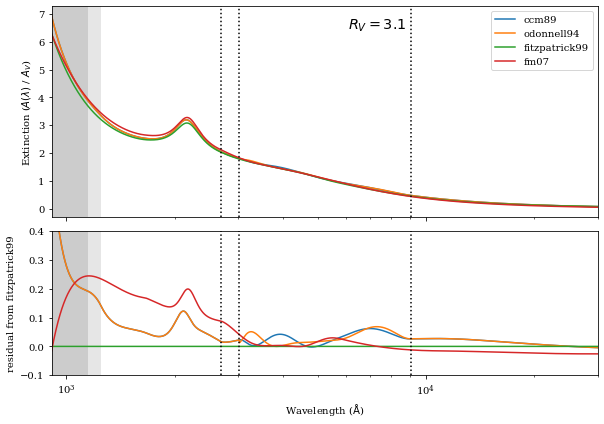

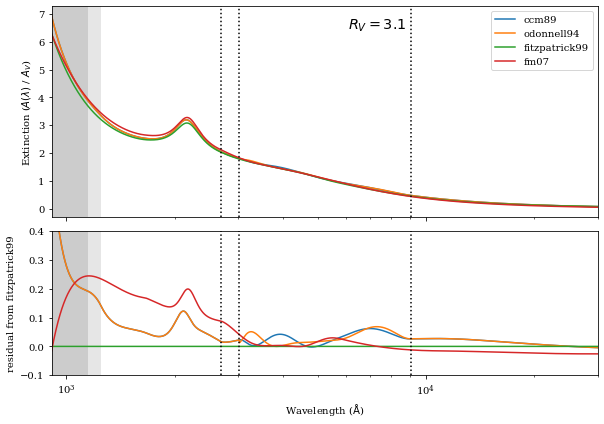

In [74]:
from extinction_plot import extinction_figure

wavee = np.logspace(np.log10(910.), np.log10(30000.), 2000)

a_lambda = {'ccm89': extinction.ccm89(wavee, 1.0, 3.1),
            'odonnell94': extinction.odonnell94(wavee, 1.0, 3.1),
            'fitzpatrick99': extinction.fitzpatrick99(wavee, 1.0),
            'fm07': extinction.fm07(wavee, 1.0)}
extinction_figure(wavee, a_lambda, 'fitzpatrick99')